<h2> Coleta e manipulação de dados

In [30]:
import pandas as pd

In [31]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_submission = pd.read_csv('sample_submission.csv')

In [32]:
df_train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [33]:
df_train.shape

(27481, 4)

In [34]:
df_test.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [35]:
df_test.shape

(3534, 3)

In [37]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

<Axes: xlabel='sentiment', ylabel='count'>

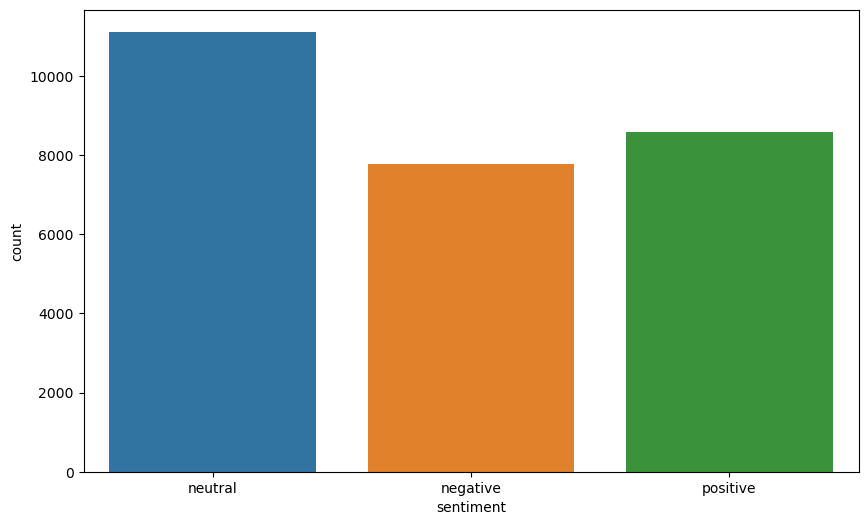

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df_train)

<h2> Limpar o texto para a extração das informações - target

In [39]:
import re
import string

def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [40]:
df_train['text'] = df_train['text'].apply(lambda x:clean_text(x))
df_train['selected_text'] = df_train['selected_text'].apply(lambda x:clean_text(x))

In [41]:
from collections import Counter

df_train['temp_list'] = df_train['selected_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df_train['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient()

,Common_words,count
0,i,7200
1,to,5305
2,the,4590
3,a,3538
4,my,2783
5,you,2624
6,and,2321
7,it,2158
8,is,2115
9,in,1986


In [42]:
from nltk.corpus import stopwords

def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
df_train['temp_list'] = df_train['temp_list'].apply(lambda x:remove_stopword(x))

In [43]:
top = Counter([item for sublist in df_train['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,good,1251
2,day,1058
3,love,909
4,happy,852
5,like,774
6,get,772
7,dont,765
8,go,700
9,cant,613
10,work,612


In [44]:
df_train['temp_list1'] = df_train['text'].apply(lambda x:str(x).split())
df_train['temp_list1'] = df_train['temp_list1'].apply(lambda x:remove_stopword(x))

<h2> Aplicando o mesmo modelo para todo o texto

In [45]:
top = Counter([item for sublist in df_train['temp_list1'] for item in sublist])
temp = pd.DataFrame(top.most_common(25))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
1,day,2044
2,good,1549
3,get,1426
4,like,1346
5,go,1267
6,dont,1200
7,love,1122
8,work,1112
9,going,1096
10,today,1096


<h2> Palavras mais comuns por sentimento

In [46]:
Positive_sent = df_train[df_train['sentiment']=='positive']
Negative_sent = df_train[df_train['sentiment']=='negative']
Neutral_sent = df_train[df_train['sentiment']=='neutral']

In [47]:
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,good,826
1,happy,730
2,love,697
3,day,456
4,thanks,439
5,great,364
6,fun,287
7,nice,267
8,mothers,259
9,hope,245


In [48]:
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
1,miss,358
2,sad,343
3,sorry,300
4,bad,246
5,hate,230
6,dont,221
7,cant,201
8,sick,166
9,like,162
10,sucks,159


In [49]:
top = Counter([item for sublist in Neutral_sent['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Oranges')

,Common_words,count
1,get,612
2,go,569
3,day,492
4,dont,482
5,going,472
6,work,467
7,like,445
8,got,441
9,today,427
10,lol,427


<h2> Identificando palavras únicas para cada sentimento

In [50]:
raw_text = [word for word_list in df_train['temp_list1'] for word in word_list]

In [51]:
def words_unique(sentiment,numwords,raw_words):
    outras = []
    for item in df_train[df_train.sentiment != sentiment]['temp_list1']:
        for word in item:
            outras .append(word)
    outras  = list(set(outras ))
    
    especificas = [x for x in raw_text if x not in outras]
    
    counter = Counter()
    
    for item in df_train[df_train.sentiment == sentiment]['temp_list1']:
        for word in item:
            counter[word] += 1
    keep = list(especificas)
    
    for word in list(counter):
        if word not in keep:
            del counter[word]
    
    Unique_words = pd.DataFrame(counter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words

In [52]:
Unique_Positive= words_unique('positive', 20, raw_text)
Unique_Positive.style.background_gradient(cmap='Greens')

,words,count
0,congratulations,29
1,thnx,10
2,appreciated,8
3,shared,7
4,presents,7
5,greetings,7
6,blessings,6
7,mothersday,6
8,mcr,6
9,coolest,6


In [53]:
Unique_Negative= words_unique('negative', 10, raw_text)
Unique_Negative.style.background_gradient(cmap='Reds')

,words,count
0,ache,12
1,suffering,9
2,allergic,7
3,cramps,7
4,saddest,7
5,pissing,7
6,sob,6
7,dealing,6
8,devastated,6
9,noes,6


In [54]:
Unique_Neutral= words_unique('neutral', 10, raw_text)
Unique_Neutral.style.background_gradient(cmap='Oranges')

,words,count
0,settings,9
1,explain,7
2,mite,6
3,hiya,6
4,reader,5
5,pr,5
6,sorta,5
7,fathers,5
8,enterprise,5
9,guessed,5
